In [1]:
%pip install celluloid


[notice] A new release of pip available: 22.3 -> 22.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
%pip install ffmpeg

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3 -> 22.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import math
from celluloid import Camera
import ffmpeg

In [7]:
X_0, X_1, Y, fi1, fi2 = [], [], [], [], []
A_y, B_y = [], []
A_x, B_x = [], []
with open('./results/log.txt') as f:
  for line in f:
    # X[0], X[1], X[2] - y, X[3], X[4], A_y
    # X[0], X[1] - координата Х центров окружностей, A_y, B_y - верхние точки эллиптических дуг
    line_s = line.split()
    X_0.append(float(line_s[0]))
    X_1.append(float(line_s[1]))
    Y.append(float(line_s[2]))
    fi1.append(float(line_s[3]))
    fi2.append(float(line_s[4]))
    
    A_y.append(float(line_s[5]))
    B_y.append(float(line_s[5]))
    A_x.append(-0.353)
    B_x.append(0.353)

# print(X_0, '\n', X_1, '\n', Y, '\n', A_y, '\n', B_y, '\n', A_x, '\n', B_x)

In [8]:
import seaborn as sns
from seaborn import set_style
set_style('darkgrid')

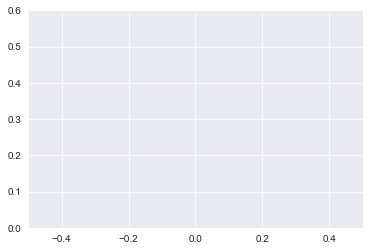

In [18]:
fig, ax = plt.subplots()  
plt.xlim(-0.5,0.5)
plt.ylim(0,0.6)

camera = Camera(fig)
for i in range(len(X_0)):

    height1 = width1 = 2*math.sqrt((A_x[i]-X_0[i])**2+(A_y[i]-Y[i])**2)  # math.sqrt((A_x[i]-X_1[i])**2+(A_y[i]-Y[i])**2) - радиус

#     print('i', i, '\nX_0[i]', X_0[i], '\nY[i]', Y[i], '\nA_x[i]', A_x[i], '\nA_y[i]', A_y[i], '\nwidth1', 
#             width1, '\nheight1', height1, '\nradius', math.sqrt((A_x[i]-X_0[i])**2+(A_y[i]-Y[i])**2))   

    ax.plot(X_0[i], Y[i], 'co', markersize=12, label= 'x1')
    ax.plot(A_x[i], A_y[i], 'go', markersize=12, zorder=4, label= 'A')
    e1 = mpl.patches.Arc((X_0[i], Y[i]), width1, height1, angle=90, theta1=0, theta2=180, linewidth=2, color='red', zorder=5)
    ax.add_patch(e1)
    
    height2 = width2 = 2*math.sqrt((B_x[i]-X_1[i])**2+(B_y[i]-Y[i])**2)

#     print('i', i, '\nX_1[i]', X_1[i], '\nY[i]', Y[i], '\nB_x[i]', B_x[i], '\nB_y[i]', B_y[i], 
#             '\nwidth2', width2, '\nheight2', height2, '\nradius', math.sqrt((B_x[i]-X_1[i])**2+(B_y[i]-Y[i])**2))


    ax.plot(X_1[i], Y[i], 'co', markersize=12, label= 'x2')
    ax.plot(B_x[i], B_y[i], 'go', markersize=12, zorder=1, label= 'B')
    e2 = mpl.patches.Arc((X_1[i], Y[i]), width2, height2, angle=90, theta1=180, theta2=360, linewidth=2, color='red', zorder=2)
    ax.add_patch(e2)
    
    camera.snap()

from IPython.display import HTML
animation = camera.animate()
HTML(animation.to_html5_video())

# Графики времени выполнения, ускорения и эффективности

In [19]:
import os
results = os.listdir('./results')
delta_tau = [0.005, 0.01, 0.05, 0.1, 0.5]
time_parallel = {}

for delta_tau_ in delta_tau:
    time_parallel[delta_tau_] = []

    with open(f'./results/log{delta_tau_}.txt') as f:
        for line in f:
            time_parallel[delta_tau_].append(float(line))

mean_time_parallel = []
for delta_tau_ in delta_tau:
    mean_time_parallel.append(np.mean(time_parallel[delta_tau_]))

In [20]:
mean_time_parallel

[44.28588395,
 22.78203079,
 4.4563092300000005,
 2.3010900100000002,
 0.5156071900000001]

In [21]:
time_serial = {}

for delta_tau_ in delta_tau:
    time_serial[delta_tau_] = []

    with open(f'./results/log_seq{delta_tau_}.txt') as f:
        for line in f:
            time_serial[delta_tau_].append(float(line))

mean_time_serial = []
for delta_tau_ in delta_tau:
    mean_time_serial.append(np.mean(time_serial[delta_tau_]))

In [22]:
mean_time_serial

[57.86589882999999, 28.72167854, 5.82594934, 2.8839363600000003, 0.63812864]

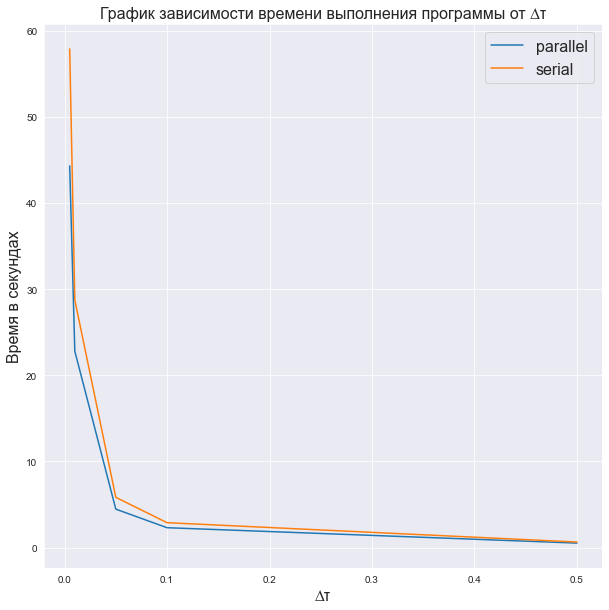

In [23]:
plt.figure(figsize=(10, 10))
plt.plot(delta_tau, mean_time_parallel)
plt.plot(delta_tau, mean_time_serial)
plt.xlabel('∆τ', fontsize=16)
plt.ylabel('Время в секундах', fontsize=16)
plt.title("График зависимости времени выполнения программы от ∆τ", size=16)
plt.legend(['parallel', 'serial'], fontsize=16)

**Ускорение**

In [24]:
# S = T_serial/T_parallel
# массив с временем выполнения последовательной программы при разных тау/ массив с временем выполнения параллельной программы при разных тау
speed_up = []
for i in range(len(delta_tau)):
    speed_up.append(mean_time_serial[i]/mean_time_parallel[i])
speed_up

[1.306644322496356,
 1.2607163428383725,
 1.3073485342488227,
 1.253291417314006,
 1.2376255653067985]

Text(0.5, 1.0, 'График зависимости ускорения от ∆τ')

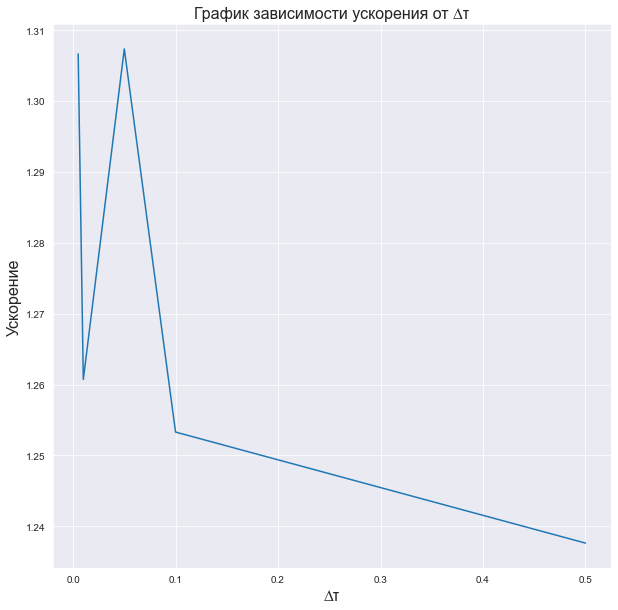

In [25]:
plt.figure(figsize=(10, 10))
plt.plot(delta_tau, speed_up)

plt.xlabel('∆τ', fontsize=16)
plt.ylabel('Ускорение', fontsize=16)
plt.title("График зависимости ускорения от ∆τ", size=16)

**Эффективность**

In [26]:
# E = speed_up/number of threads
efficiency = []
for i in range(len(delta_tau)):
    efficiency.append(speed_up[i]/5)
efficiency

[0.2613288644992712,
 0.2521432685676745,
 0.26146970684976456,
 0.25065828346280117,
 0.2475251130613597]

Text(0.5, 1.0, 'График зависимости эффективности от ∆τ')

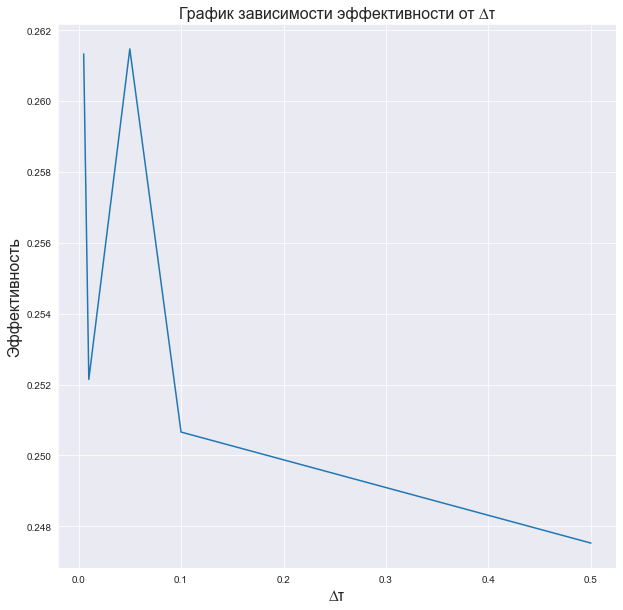

In [27]:
plt.figure(figsize=(10, 10))
plt.plot(delta_tau, efficiency)

plt.xlabel('∆τ', fontsize=16)
plt.ylabel('Эффективность', fontsize=16)
plt.title("График зависимости эффективности от ∆τ", size=16)